# HOMEWORK 9

In this homework, you are going to use the dlib face detector and apply it to an image of your liking. You can follow the procedure shown in lesson 9. Please always comment your code so I can see what you're doing :-)

For this homework we are not going to provide you with any code, you'll have to build the face detector on your own.

### Step 0

Run the necessary imports.

In [148]:
import dlib
import cv2
import random
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [13, 6]

### Step 1

Load an image (any image that contains faces).

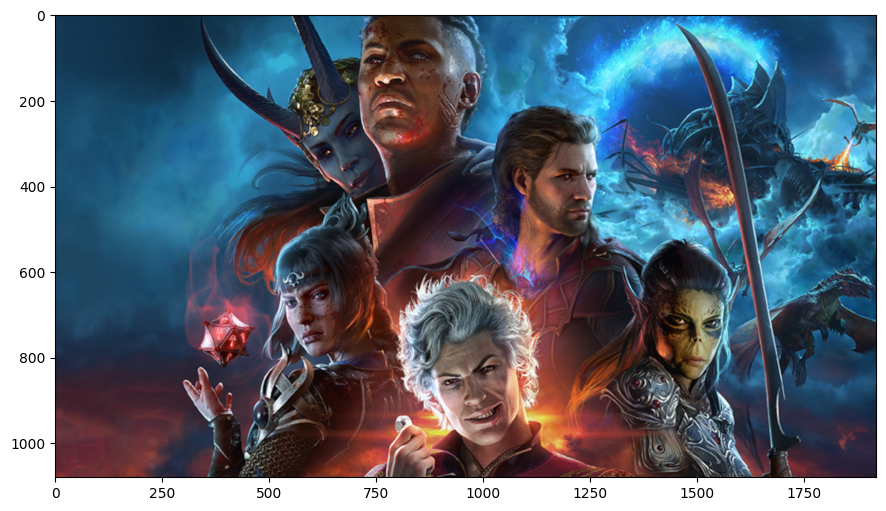

In [149]:
img = cv2.imread("../data/bg3_all_preview.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img)

### Step 2

Load the dlib face predictor.

In [5]:
detector = dlib.get_frontal_face_detector()

### Step 3

Run the predictor on your image.

In [57]:
rects = detector(img, 1)
print('Number of detected faces:', len(rects))
print(rects)
print(rects[0])

Number of detected faces: 4
rectangles[[(902, 779) (1088, 965)], [(1130, 322) (1285, 477)], [(633, -44) (954, 313)], [(489, 593) (675, 779)]]
[(902, 779) (1088, 965)]


### Step 4

Draw bounding boxes around the detected faces and plot the image. Use different colour for each face.

In [39]:
def rect_to_bb(rect):
    # Dlib rect --> OpenCV rect
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    return (x, y, w, h)

def plot_cv2_rec(img, rects, title='dlib'):
    result_dlib = np.copy(img)
    for rect in rects:    
        # Draw rectangle around the face
        x, y, w, h = rect_to_bb(rect)
        # print(x, y, w, h)
        cv2.rectangle(result_dlib, (x, y), (x+w, y+h), (random.randint(50,255), random.randint(50,255), random.randint(50,255)), 3)
        
    plt.imshow(result_dlib), plt.title(title)

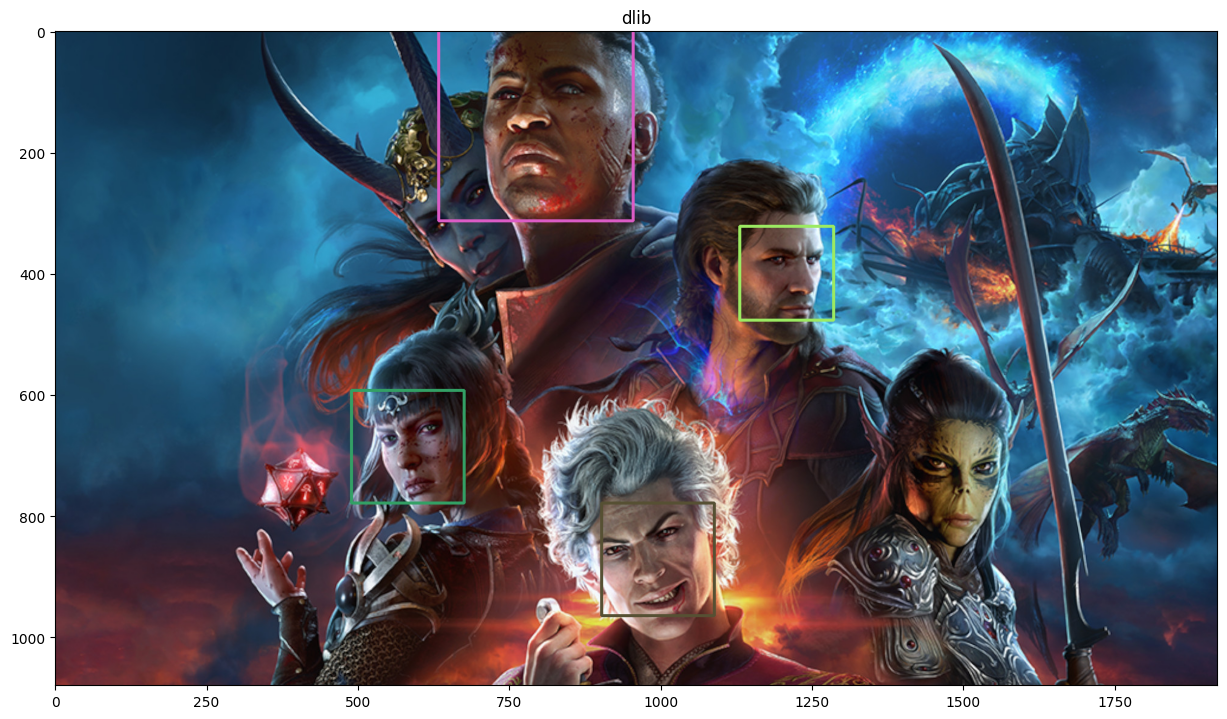

In [58]:
plot_cv2_rec(img, rects)

результат який зображено вище можу прокоментувати як не підходяща модель для цього фото. На ньому зображено видуманих персонажів і найбільш чудернацьких, які не сильно схожі на людей - алгоритм не визначає.

### Step 5 (optional) - ERROR

Repeat the process with the Viola-Jons detector. Repeat the process with both detectors with a different and more challenging image (more faces, smaller faces, people with glasses, hats, helmets, etc.). How did the detectors perform? Are they robust?

In [28]:
casc_path = 'C:/Users/Acer/anaconda3/envs/CV_Dvorzhak/Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml'
# НЕЕЕЕ, ну так не цікаво. Я не можу виконати це завдання не маючи цього .xml !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

face_cascade = cv2.CascadeClassifier(casc_path)
print(face_cascade)
# minNeighbors = 0 shows all the detection at all scale, a value of approx. 5 shall felter out all the spurious detections
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10, flags=cv2.CASCADE_SCALE_IMAGE)

print('Number of detected faces:', len(faces))

# Draw rectangle around each face
result = np.copy(img)
faces_img = []
for (x, y, w, h) in faces: 
    # Draw rectangle around the face
    cv2.rectangle(result, (x, y), (x+w, y+h), (0, 255, 0), 3)
    faces_img.append(img[y:y+h, x:x+w, :])
    
plt.imshow(result)

< cv2.CascadeClassifier 0000027E867F3010>


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'


### Repeat with different image

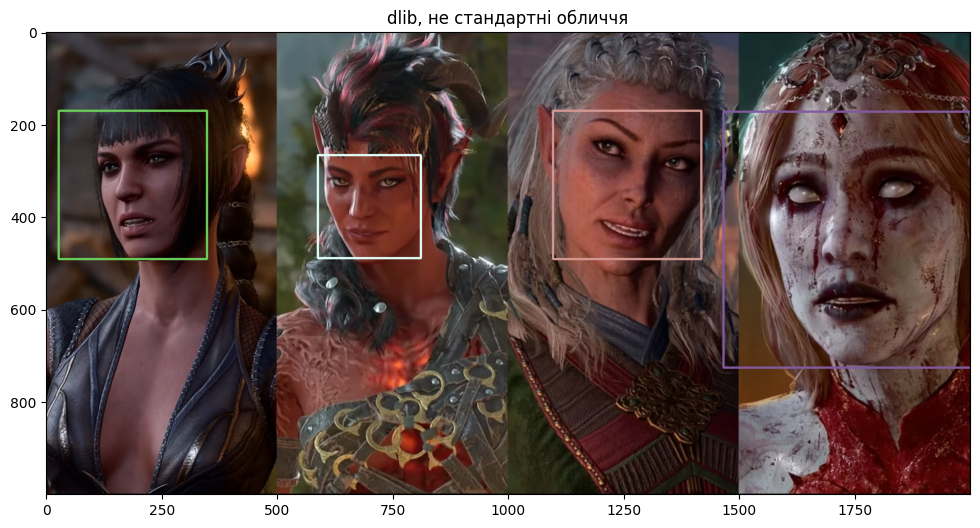

In [150]:
img = cv2.imread("../data/bg3_female.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

rects = detector(gray, 1)
plot_cv2_rec(img, rects, "dlib, не стандартні обличчя")

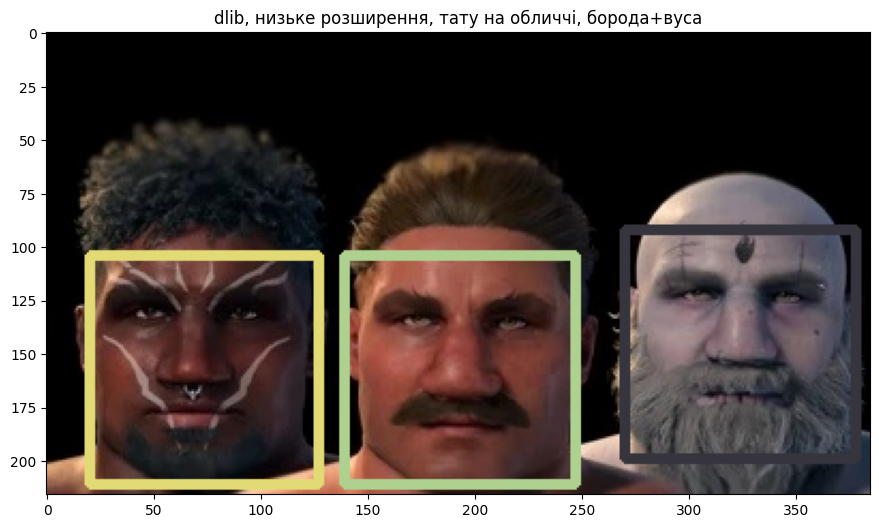

In [151]:
img = cv2.imread("../data/dwarfs.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

rects = detector(gray, 1)
plot_cv2_rec(img, rects, "dlib, низьке розширення, тату на обличчі, борода+вуса")

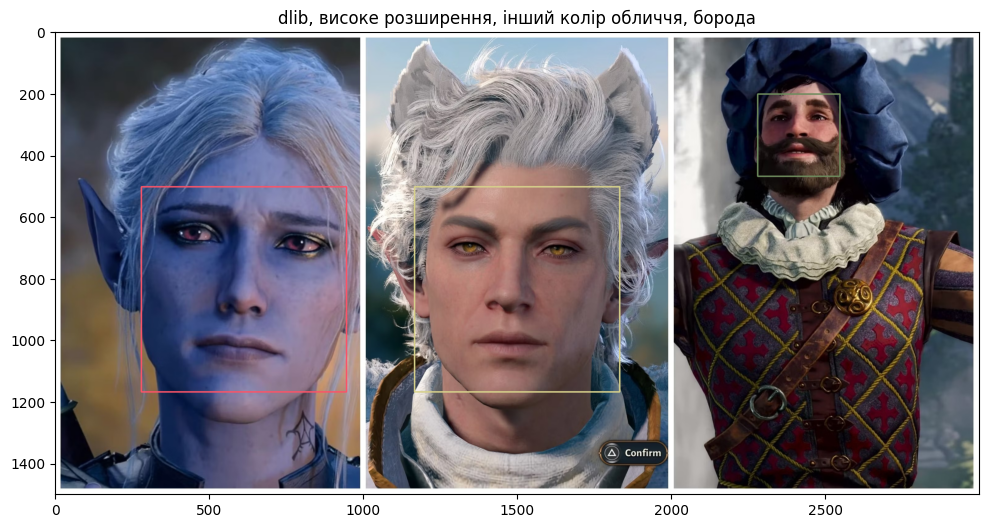

In [152]:
img = cv2.imread("../data/Untitled.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

rects = detector(gray, 1)
plot_cv2_rec(img, rects, "dlib, високе розширення, інший колір обличчя, борода")

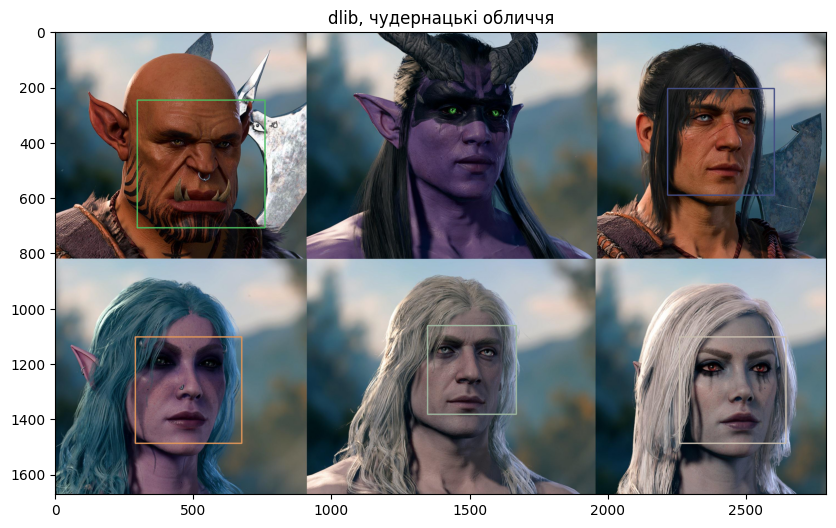

In [153]:
img = cv2.imread("../data/Untitled2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

rects = detector(gray, 1)
plot_cv2_rec(img, rects, "dlib, чудернацькі обличчя")

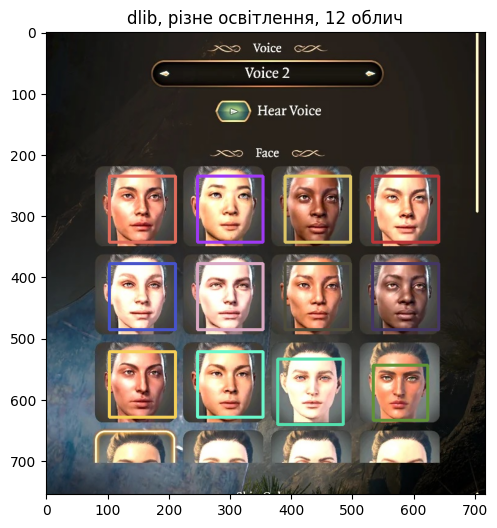

In [154]:
img = cv2.imread("../data/faces_grid.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

rects = detector(gray, 1)
plot_cv2_rec(img, rects, "dlib, різне освітлення, 12 облич")

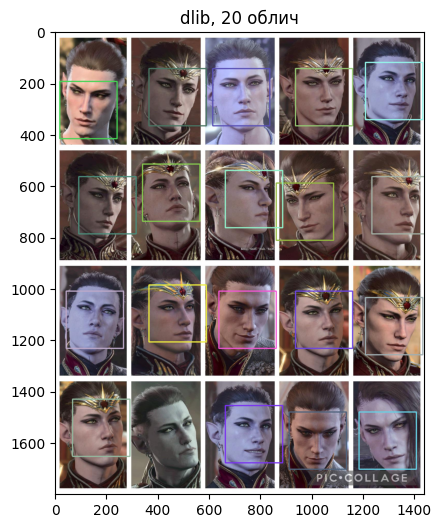

In [155]:
img = cv2.imread("../data/faces_20.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

rects = detector(gray, 1)
plot_cv2_rec(img, rects, "dlib, 20 облич")

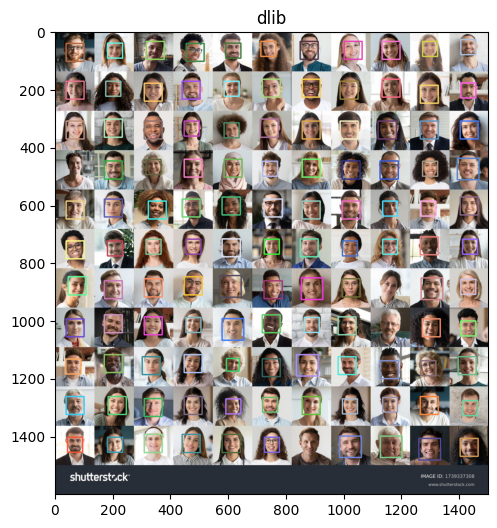

In [156]:
img = cv2.imread("../data/many_faces2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

rects = detector(gray, 1)
plot_cv2_rec(img, rects)

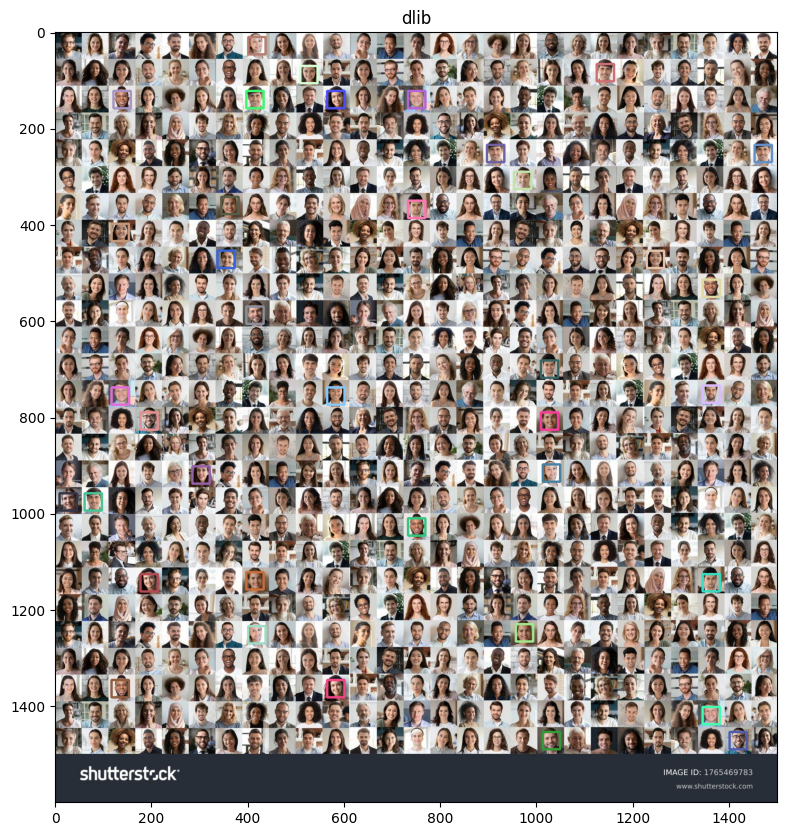

In [ ]:
img = cv2.imread("../data/many_faces.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

rects = detector(gray, 1)
plot_cv2_rec(img, rects)

In [85]:
h,w = img.shape[:2]
h

976

(97, 97)


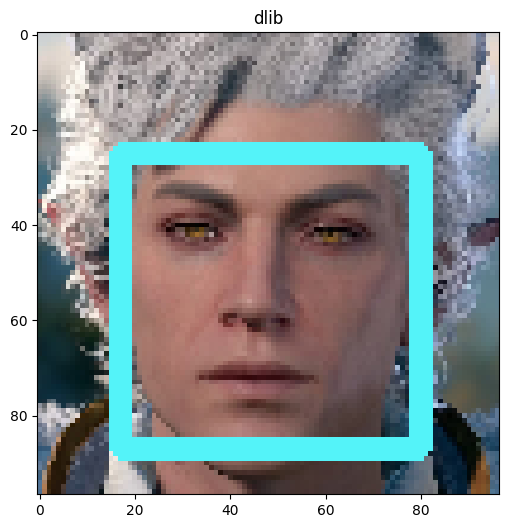

In [157]:
img = cv2.imread("../data/astarion.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h,w = img.shape[:2]
img = cv2.resize(img, (w//10, h//10))
print(img.shape[:2])
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

rects = detector(gray, 1)
plot_cv2_rec(img, rects)

(46, 46)


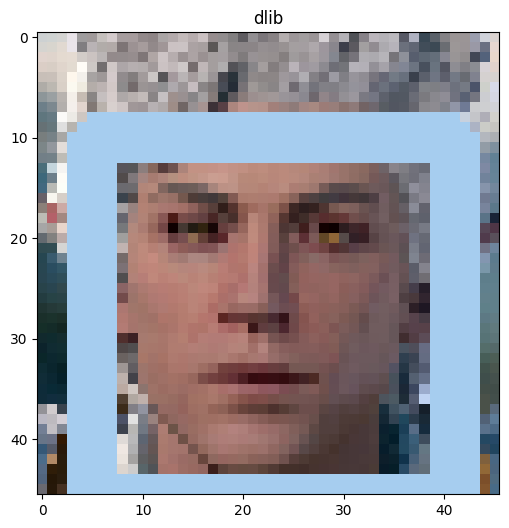

In [158]:
img = cv2.imread("../data/astarion.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h,w = img.shape[:2]
img = cv2.resize(img, (w//21, h//21))
print(img.shape[:2])
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

rects = detector(gray, 1)
plot_cv2_rec(img, rects)

(32, 32)
rectangles[[(-7, -6) (33, 34)]]


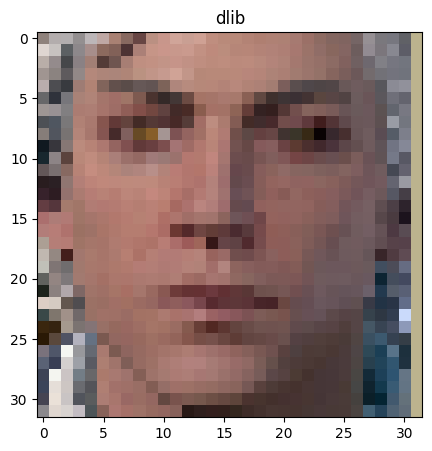

In [129]:
img = cv2.imread("../data/astarion2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h,w = img.shape[:2]
img = cv2.resize(img, (w//22, h//22))
print(img.shape[:2])
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

rects = detector(gray, 1)
print(rects)
plot_cv2_rec(img, rects)